In [79]:
import torch
from torch import nn,optim
from torchvision import datasets as dsets
from torchvision import transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np
from statistics import mean

In [80]:
train = dsets.MNIST(root = './data', train = True, transform=transforms.ToTensor(), download=True)
valid = dsets.MNIST(root = './data', train = False, transform=transforms.ToTensor(), download=True)

In [81]:
train_loader = DataLoader(dataset = train, batch_size = 100, shuffle = True)
val_loader = DataLoader(dataset = valid, batch_size = 10000, shuffle = True)

In [82]:
class dropout_model(nn.Module):

    def __init__(self, insize, outsize, p):
        super(dropout_model, self).__init__()
        self.dropout = nn.Dropout(p = p)
        self.linear = nn.Linear(insize, outsize)

    def forward(self, x):
        out = self.dropout(self.linear(x))
        return out

In [83]:
dropmodel = dropout_model(784, 10, 0.7)
nodropmodel = dropout_model(784, 10, 0)

In [84]:
def plotparameters(model, message):
    params = model.state_dict()['linear.weight']
    fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (20,8))
    ax = ax.flatten()

    fig.suptitle(message, size = 15)
    for i in range(params.shape[0]):
        ax[i].imshow(params[i].reshape((28,28)))
        ax[i].axis(False)

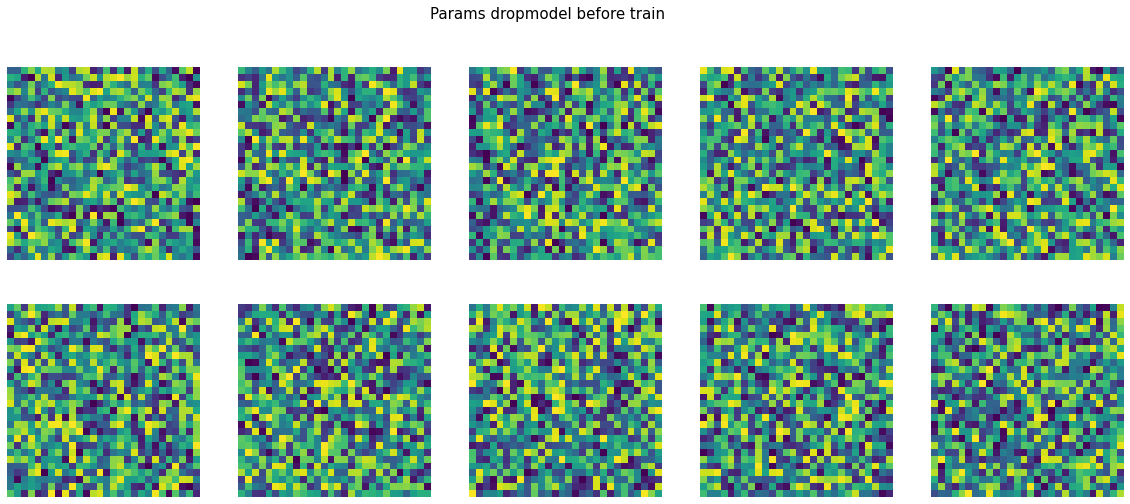

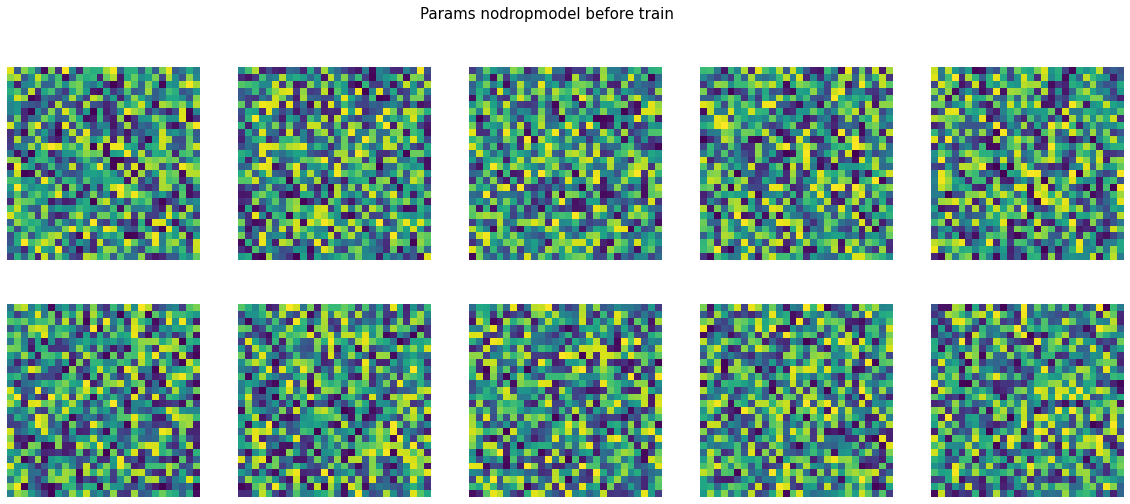

In [85]:
plotparameters(dropmodel, 'Params dropmodel before train')
plotparameters(nodropmodel, 'Params nodropmodel before train')

In [86]:
def train_model(model, epochs, learning_rate, final_lr):

    to_plot = []
    accuracy = []
    criterion = nn.CrossEntropyLoss()

    lr_decay = (final_lr - learning_rate) / int((3/4) * epochs)

    for epoch in range(epochs):
        opt = optim.SGD(model.parameters(), lr=learning_rate)

        print('EPOCH : ', epoch + 1)
        print('Batch : ', end = '')
        counter = 0
        mean_loss_list = []
        for x,y in train_loader :

            opt.zero_grad()
            x = x.view(x.shape[0], x.shape[2] * x.shape[3])
            yhat = model.forward(x)

            loss = criterion(yhat,y)
            mean_loss_list.append(loss.item())

            loss.backward()
            opt.step()

            if counter % 100 == 0 : 
                print(str(counter) + ' --> ', end = '', flush = True)
            counter += 1

        mean_loss = mean(mean_loss_list)
        to_plot.append(mean_loss)

        correct = 0
        incorrect = 0

        for x,y in val_loader :

            x = x.view(x.shape[0], x.shape[2] * x.shape[3])
            yhat = model.forward(x)

            for i in range(yhat.shape[0]):
                pred = yhat[i].argmax().item()
                actual = y[i].item()

                if pred == actual :
                    correct += 1
                else :
                    incorrect += 1
        
        acc = (correct / (correct + incorrect)) * 100
        accuracy.append(acc)

        print()
        print('Mean loss : ', mean_loss)
        print(f'Accuracy on test set : {acc} %')
        print('-' * 50)

        learning_rate = learning_rate - lr_decay

    return to_plot, accuracy

In [88]:
droploss, dropacc = train_model(dropmodel, 20, 0.5, 0.0001)

EPOCH :  1
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  1.7538742397228877
Accuracy on test set : 35.870000000000005 %
--------------------------------------------------
EPOCH :  2
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  1.7401859976847966
Accuracy on test set : 37.32 %
--------------------------------------------------
EPOCH :  3
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  1.7445877746740976
Accuracy on test set : 36.03 %
--------------------------------------------------
EPOCH :  4
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  1.7559551443656285
Accuracy on test set : 36.58 %
--------------------------------------------------
EPOCH :  5
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  1.7751631104946137
Accuracy on test set : 36.33 %
--------------------------------------------------
EPOCH :  6
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  1.798016

In [89]:
nodroploss, nodropacc = train_model(nodropmodel, 20, 0.1, 0.0001)

EPOCH :  1
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.5341895919293165
Accuracy on test set : 90.38000000000001 %
--------------------------------------------------
EPOCH :  2
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.35778426652153333
Accuracy on test set : 91.21000000000001 %
--------------------------------------------------
EPOCH :  3
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.3290230505416791
Accuracy on test set : 91.60000000000001 %
--------------------------------------------------
EPOCH :  4
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.3138677689184745
Accuracy on test set : 91.82000000000001 %
--------------------------------------------------
EPOCH :  5
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.30402456005414324
Accuracy on test set : 91.86 %
--------------------------------------------------
EPOCH :  6
Batch : 0 --> 100 --> 200 --> 300 --> 4

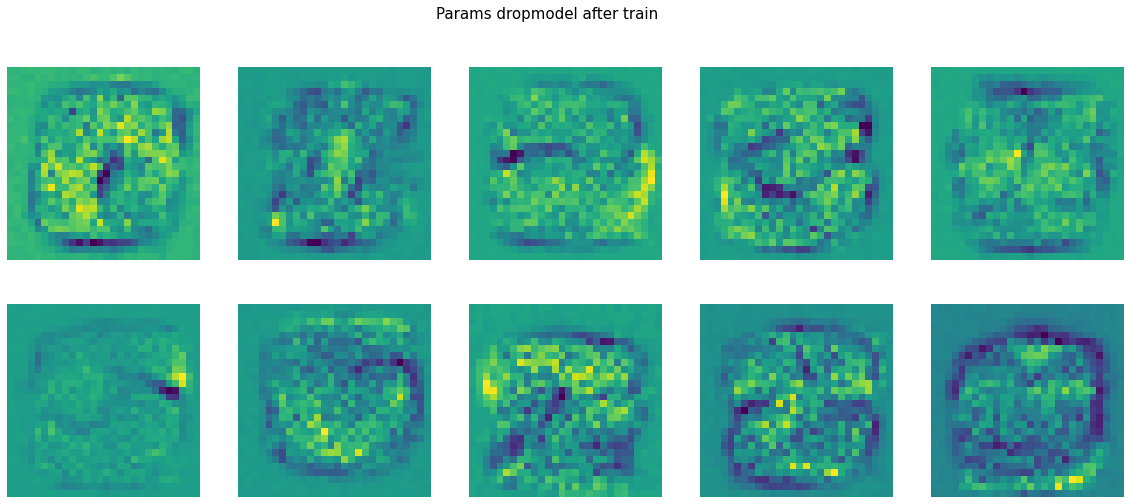

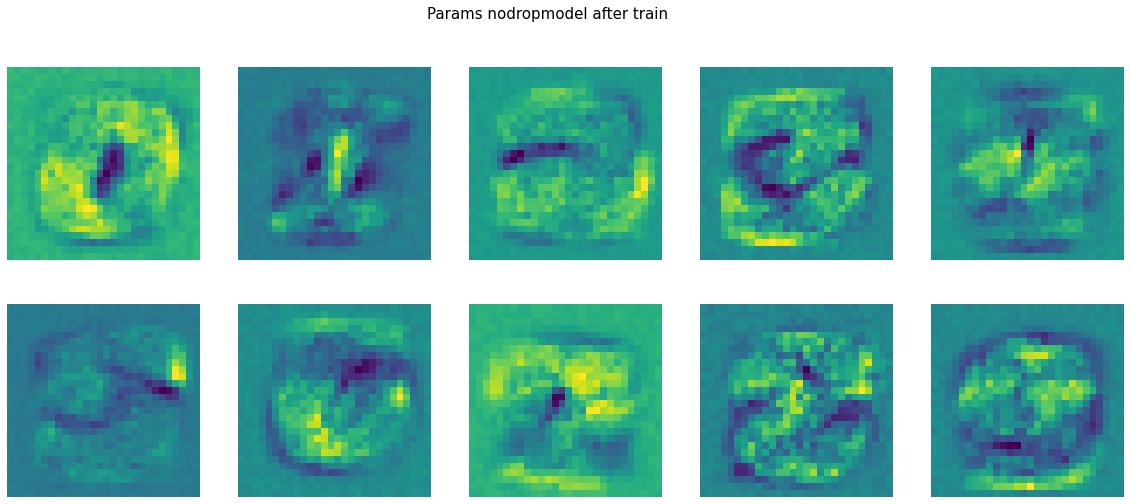

In [90]:
plotparameters(dropmodel, 'Params dropmodel after train')
plotparameters(nodropmodel, 'Params nodropmodel after train')